# Tracer les profils en fonction du temps de réponse

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

In [2]:
RunNo = [5, 6, 9, 10, 12, 13]

In [3]:
tab_bon = [28, 29, 30, 49, 50, 51, 52, 53, 68, 69, 70, 71, 72]

In [4]:
Run = RunNo + tab_bon

Les df correspondant à l'ACC contiennent des 'NaN' car les valeurs incohérentes ont été supprimées.

In [6]:
#temps de réponse par rapport au leader
df_tps_reponse_leader_CARMA = pd.read_csv('df_tps_reponse_leader_CARMA.csv', sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_leader_CACC_proof = pd.read_csv('df_tps_reponse_leader_CACC.csv', sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_leader_ACC = pd.read_csv('df_tps_reponse_leader_ACC.csv', sep = ',', decimal = '.', low_memory = False)

#temps de réponse par rapport au prédécesseur
df_tps_reponse_predec_CARMA = pd.read_csv('df_tps_reponse_predec_CARMA.csv', sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_predec_CACC_proof = pd.read_csv('df_tps_reponse_predec_CACC.csv', sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_predec_ACC = pd.read_csv('df_tps_reponse_predec_ACC.csv', sep = ',', decimal = '.', low_memory = False)

In [7]:
#vitesse du leader
df_vitesse_CARMA = pd.read_csv('df_vitesse_leader_CARMA.csv', sep = ',', decimal = '.', low_memory = False)
df_vitesse_CACC_proof = pd.read_csv('df_vitesse_leader_CACC.csv', sep = ',', decimal = '.', low_memory = False)
df_vitesse_ACC = pd.read_csv('df_vitesse_leader_ACC.csv', sep = ',', decimal = '.', low_memory = False)

In [8]:
#vitesse au leader
df_ecart_position_leader_CARMA = pd.read_csv('df_ecart_position_leader_CARMA.csv', sep = ',', decimal = '.', low_memory = False)
df_ecart_position_leader_CACC_proof = pd.read_csv('df_ecart_position_leader_CACC.csv', sep = ',', decimal = '.', low_memory = False)
df_ecart_position_leader_ACC = pd.read_csv('df_ecart_position_leader_ACC.csv', sep = ',', decimal = '.', low_memory = False)

#vitesse au prédécesseur
df_ecart_position_predec_CARMA = pd.read_csv('df_ecart_position_predec_CARMA.csv', sep = ',', decimal = '.', low_memory = False)
df_ecart_position_predec_CACC_proof = pd.read_csv('df_ecart_position_predec_CACC.csv', sep = ',', decimal = '.', low_memory = False)
df_ecart_position_predec_ACC = pd.read_csv('df_ecart_position_predec_ACC.csv', sep = ',', decimal = '.', low_memory = False)

In [10]:
df_tps_reponse_predec_CACC

,F,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,...,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,1,0.40,0.65,0.30,1.75,0.05,0.10,0.05,1.75,...,0.1,0.4,0.4,0.3,0.3,0.6,0.5,1.4,1.5,1.1
1,2,2,2.75,-0.20,0.00,0.65,1.60,-0.05,0.05,1.95,...,0.0,0.2,-0.1,0.0,1.6,0.0,0.1,2.2,2.4,2.5
2,3,3,4.60,1.30,1.60,2.90,1.55,0.20,0.15,0.80,...,0.9,-0.5,-0.2,-0.2,1.7,0.0,-0.2,-0.4,1.5,1.7
3,4,4,-2.95,-1.00,-1.35,1.50,3.65,0.15,4.55,1.50,...,-0.2,0.5,0.2,0.1,1.5,0.1,-0.1,2.5,2.3,2.3


## Vitesse

In [71]:
#par rapport au leader
df_vitesse_CACC = pd.DataFrame()
df_vitesse_CACC['F'] = np.arange(1, 5)
df_vitesse_CACC = pd.concat([df_vitesse_CACC, df_vitesse_CACC_proof, df_vitesse_CARMA], axis = 1)

In [72]:
df_vitesse_CACC

,F,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,...,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,1,26.34,19.76,26.34,0.0,26.360001,19.74,26.299999,0.0,...,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
1,2,2,26.34,19.76,26.34,0.0,26.360001,19.74,26.299999,0.0,...,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
2,3,3,26.34,19.76,26.34,0.0,26.360001,19.74,26.299999,0.0,...,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702
3,4,4,26.34,19.76,26.34,0.0,26.360001,19.74,26.299999,0.0,...,0.001,20.056,26.64,20.247,0.0,20.155,26.675,0.0,20.08,26.702


In [73]:
#suppression de la colonne 'follower' répétée
#par rapport au leader
df_tps_reponse_leader_CACC = df_tps_reponse_leader_CACC.drop(df_tps_reponse_leader_CACC.columns[21], axis='columns')
df_tps_reponse_predec_CACC = df_tps_reponse_predec_CACC.drop(df_tps_reponse_predec_CACC.columns[21], axis='columns')
df_vitesse_CACC = df_vitesse_CACC.drop(df_vitesse_CACC.columns[21], axis='columns')

In [14]:
colonnes = list(df_tps_reponse_leader_CACC.columns)

In [15]:
for i in range(1, len(colonnes)):
    colonnes[i] = 'chgt{}'.format(i)

In [16]:
len(df_vitesse_CACC.columns)

34

In [17]:
df_tps_reponse_leader_CACC.columns = colonnes
df_tps_reponse_predec_CACC.columns = colonnes
df_vitesse_CACC.columns = colonnes

No handles with labels found to put in legend.


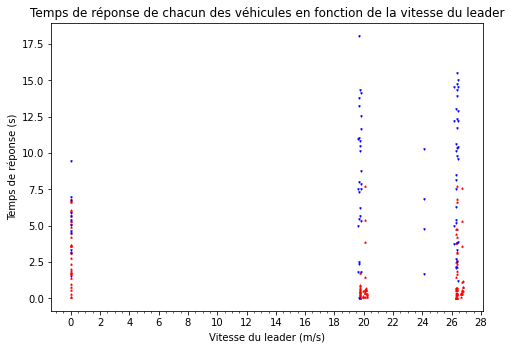

In [18]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_leader_CACC.columns)):
    ax.plot(df_vitesse_CACC['chgt{}'.format(j)], df_tps_reponse_leader_CACC['chgt{}'.format(j)], '^r', markersize = 1.5)
for j in range(1, len(df_tps_reponse_leader_ACC.columns)):
    ax.plot(df_vitesse_ACC['chgt{}'.format(j)], df_tps_reponse_leader_ACC['chgt{}'.format(j)], 'vb', markersize = 1.5)
ax.set_xlabel("Vitesse du leader (m/s)")
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules en fonction de la vitesse du leader")
ax.legend(loc='best', frameon=False)
plt.show()

## Ecart au leader

L'écart au leader est pris pour le temps de réponse par rapport au leader.

In [19]:
#par rapport au leader
df_ecart_position_leader_CACC = pd.DataFrame()
df_ecart_position_leader_CACC['F'] = np.arange(1, 5)
df_ecart_position_leader_CACC = pd.concat([df_ecart_position_leader_CACC, df_ecart_position_leader_CACC_proof, df_ecart_position_leader_CARMA], axis = 1)

In [20]:
#suppression de la colonne 'follower' répétée
#par rapport au leader
df_ecart_position_leader_CACC = df_ecart_position_leader_CACC.drop(df_ecart_position_leader_CACC.columns[21], axis='columns')

In [21]:
df_ecart_position_leader_CACC.columns = colonnes

No handles with labels found to put in legend.


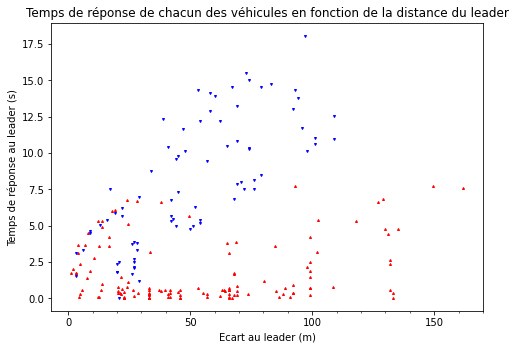

In [22]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_leader_CACC.columns)):
    ax.plot(df_ecart_position_leader_CACC['chgt{}'.format(j)], df_tps_reponse_leader_CACC['chgt{}'.format(j)], '^r', markersize = 2)
for j in range(1, len(df_tps_reponse_leader_ACC.columns)):
    ax.plot(df_ecart_position_leader_ACC['chgt{}'.format(j)], df_tps_reponse_leader_ACC['chgt{}'.format(j)], 'vb', markersize = 2)
ax.set_xlabel("Ecart au leader (m)")
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse au leader (s)")
ax.set_title("Temps de réponse de chacun des véhicules en fonction de la distance du leader")
ax.legend(loc='best', frameon=False)
plt.show()

In [38]:
#par rapport au leader
df_ecart_position_predec_CACC = pd.DataFrame()
df_ecart_position_predec_CACC['F'] = np.arange(1, 5)
df_ecart_position_predec_CACC = pd.concat([df_ecart_position_predec_CACC, df_ecart_position_predec_CACC_proof, df_ecart_position_predec_CARMA], axis = 1)

In [46]:
df_distribution_CACC = pd.DataFrame()
df_distribution_ACC = pd.DataFrame()

df_distribution_CACC['temps'] = [-1.00]*(len(df_tps_reponse_leader_CACC.columns) - 1)*(len(df_tps_reponse_leader_CACC.F[1:]))
df_distribution_ACC['temps'] = [-1.00]*(len(df_tps_reponse_leader_ACC.columns) - 1)*(len(df_tps_reponse_leader_ACC.follower))
df_distribution_CACC['vitesse'] = [-1.00]*(len(df_vitesse_CACC.columns) - 1)*(len(df_vitesse_CACC.F[1:]))
df_distribution_ACC['vitesse'] = [-1.00]*(len(df_vitesse_ACC.columns) - 1)*(len(df_vitesse_ACC.follower))
df_distribution_CACC['ecart_position_leader'] = [-1.00]*(len(df_ecart_position_leader_CACC.columns) - 1)*(len(df_ecart_position_leader_CACC.F[1:]))
df_distribution_ACC['ecart_position_leader'] = [-1.00]*(len(df_ecart_position_leader_ACC.columns) - 1)*(len(df_ecart_position_leader_ACC.follower))
df_distribution_CACC['temps_predec'] = [-1.00]*(len(df_tps_reponse_predec_CACC.columns) - 1)*(len(df_tps_reponse_predec_CACC.F[1:]))
df_distribution_ACC['temps_predec'] = [-1.00]*(len(df_tps_reponse_predec_ACC.columns) - 1)*(len(df_tps_reponse_predec_ACC.follower))
df_distribution_CACC['ecart_position_predec'] = [-1.00]*(len(df_ecart_position_predec_CACC.columns) - 1)*(len(df_ecart_position_predec_CACC.F[1:]))
df_distribution_ACC['ecart_position_predec'] = [-1.00]*(len(df_ecart_position_predec_ACC.columns) - 1)*(len(df_ecart_position_predec_ACC.follower))


inc_cacc = 0
for j in range(1, len(df_tps_reponse_leader_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_tps_reponse_leader_CACC)):
        df_distribution_CACC['temps'][inc_cacc] = df_tps_reponse_leader_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_tps_reponse_leader_ACC.columns)):
    for f in range(len(df_tps_reponse_leader_ACC.follower)):
        df_distribution_ACC['temps'][inc_acc] = df_tps_reponse_leader_ACC['chgt{}'.format(j)][f]
        inc_acc += 1
        
inc_cacc = 0
for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_tps_reponse_predec_CACC.F)):
        df_distribution_CACC['temps_predec'][inc_cacc] = df_tps_reponse_predec_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_tps_reponse_predec_ACC.columns)):
    for f in range(len(df_tps_reponse_predec_ACC.follower)):
        df_distribution_ACC['temps_predec'][inc_acc] = df_tps_reponse_predec_ACC['chgt{}'.format(j)][f]
        inc_acc += 1
        
inc_cacc = 0
for j in range(1, len(df_vitesse_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_vitesse_CACC.F)):
        df_distribution_CACC['vitesse'][inc_cacc] = df_vitesse_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_vitesse_ACC.columns)):
    for f in range(len(df_vitesse_ACC.follower)):
        df_distribution_ACC['vitesse'][inc_acc] = df_vitesse_ACC['chgt{}'.format(j)][f]
        inc_acc += 1
        
inc_cacc = 0
for j in range(1, len(df_ecart_position_leader_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_ecart_position_leader_CACC.F)):
        df_distribution_CACC['ecart_position_leader'][inc_cacc] = df_ecart_position_leader_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_ecart_position_leader_ACC.columns)):
    for f in range(len(df_ecart_position_leader_ACC.follower)):
        df_distribution_ACC['ecart_position_leader'][inc_acc] = df_ecart_position_leader_ACC['chgt{}'.format(j)][f]
        inc_acc += 1
        
inc_cacc = 0
for j in range(1, len(df_ecart_position_predec_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_ecart_position_predec_CACC.F)):
        df_distribution_CACC['ecart_position_predec'][inc_cacc] = df_ecart_position_predec_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_ecart_position_predec_ACC.columns)):
    for f in range(len(df_ecart_position_predec_ACC.follower)):
        df_distribution_ACC['ecart_position_predec'][inc_acc] = df_ecart_position_predec_ACC['chgt{}'.format(j)][f]
        inc_acc += 1

In [48]:
len(df_distribution_CACC.ecart_position_predec)

132

In [49]:
#suppression des 'NaN' pour la régression linéaire
df_distribution_ACC = df_distribution_ACC[df_distribution_ACC.temps.isna() == False]
df_distribution_ACC = df_distribution_ACC[df_distribution_ACC.temps_predec.isna() == False]

In [50]:
df_distribution_ACC = df_distribution_ACC.reset_index(drop = True)

In [51]:
#création de la variable qui à partir de deux listes crée une régression linéaire
#fit = np.polyfit(df_distribution_CACC.ecart_position_leader, df_distribution_CACC.temps, 1)

In [52]:
slope_CACC, intercept_CACC, r_value_CACC, p_value_CACC, std_err_CACC = stats.linregress(df_distribution_CACC.ecart_position_leader, df_distribution_CACC.temps)
slope_ACC, intercept_ACC, r_value_ACC, p_value_ACC, std_err_ACC = stats.linregress(df_distribution_ACC.ecart_position_leader, df_distribution_ACC.temps)

In [53]:
def predict_CACC(x):
   return slope_CACC * x + intercept_CACC

def predict_ACC(x):
   return slope_ACC * x + intercept_ACC

In [54]:
reg_CACC = predict_CACC(df_distribution_CACC.ecart_position_leader)
#plt.plot(X, fitLine, c='r')

reg_ACC = predict_ACC(df_distribution_ACC.ecart_position_leader)


In [55]:
round(slope_CACC,2)

0.01

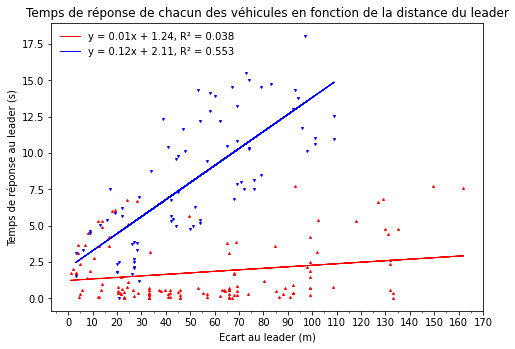

In [56]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_leader_CACC.columns)):
    ax.plot(df_ecart_position_leader_CACC['chgt{}'.format(j)], df_tps_reponse_leader_CACC['chgt{}'.format(j)], '^r', markersize = 2)
for j in range(1, len(df_tps_reponse_leader_ACC.columns)):
    ax.plot(df_ecart_position_leader_ACC['chgt{}'.format(j)], df_tps_reponse_leader_ACC['chgt{}'.format(j)], 'vb', markersize = 2)
ax.plot(df_distribution_CACC.ecart_position_leader, reg_CACC, '-r', linewidth = 1, label = 'y = {}x + {}, R² = {}'.format(round(slope_CACC, 2), round(intercept_CACC, 2), round(r_value_CACC**2, 3)))
ax.plot(df_distribution_ACC.ecart_position_leader, reg_ACC, '-b', linewidth = 1, label = 'y = {}x + {}, R² = {}'.format(round(slope_ACC, 2), round(intercept_ACC, 2), round(r_value_ACC**2, 3)))
ax.set_xlabel("Ecart au leader (m)")
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel("Temps de réponse au leader (s)")
ax.set_title("Temps de réponse de chacun des véhicules en fonction de la distance du leader")
ax.legend(loc='best', frameon=False)
plt.show()

In [57]:
r_value_CACC, r_value_ACC

(0.19459977164792264, 0.7434123446274535)

In [58]:
max_ecart_CACC = np.int(np.max(df_distribution_CACC.ecart_position_leader))
max_ecart_ACC = np.int(np.max(df_distribution_ACC.ecart_position_leader))
max_ecart_CACC, max_ecart_ACC

(162, 109)

In [59]:
for i in range(max_ecart_CACC//20):
    globals()['leader_liste_box_CACC{}'.format(i)] = list(df_distribution_CACC.temps[[20*i <= df_distribution_CACC.ecart_position_leader[k] <= 20*(i + 1) for k in range(len(df_distribution_CACC.temps))]])

for i in range(max_ecart_ACC//20):
    globals()['leader_liste_box_ACC{}'.format(i)] = list(df_distribution_ACC.temps[[20*i <= df_distribution_ACC.ecart_position_leader[k] <= 20*(i + 1) for k in range(len(df_distribution_ACC.temps))]])

[Text(3, 0, '0-20'),
 Text(10, 0, '20-40'),
 Text(17, 0, '40-60'),
 Text(24, 0, '60-80'),
 Text(31, 0, '80-100'),
 Text(38, 0, '100-120'),
 Text(45, 0, '120-140'),
 Text(52, 0, '140-160')]

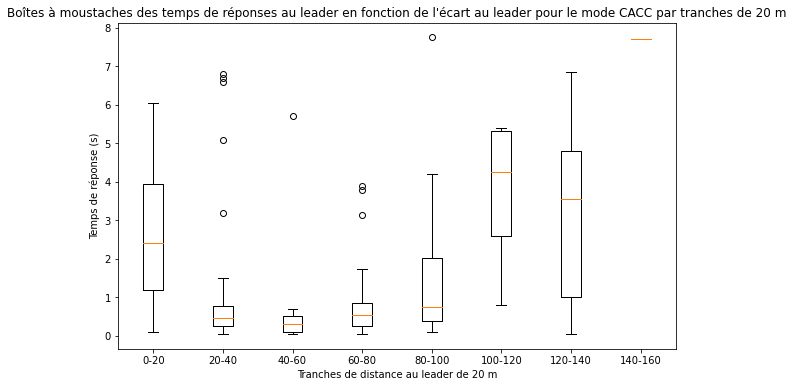

In [60]:
#boxplot
fig = plt.figure(1, figsize = (10, 6))
plt.boxplot([leader_liste_box_CACC0, leader_liste_box_CACC1, leader_liste_box_CACC2, leader_liste_box_CACC3, leader_liste_box_CACC4, leader_liste_box_CACC5, leader_liste_box_CACC6, leader_liste_box_CACC7], widths = [2, 2, 2, 2, 2, 2, 2, 2], positions = [3, 10, 17, 24, 31, 38, 45, 52])
plt.xlabel("Tranches de distance au leader de 20 m")
plt.ylabel("Temps de réponse (s)")
plt.title("Boîtes à moustaches des temps de réponses au leader en fonction de l'écart au leader pour le mode CACC par tranches de 20 m")
plt.gca().xaxis.set_ticklabels(['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160'])

In [61]:
len(leader_liste_box_CACC6)

10

[Text(1, 0, '0-20'),
 Text(2, 0, '20-40'),
 Text(3, 0, '40-60'),
 Text(4, 0, '60-80'),
 Text(5, 0, '80-100')]

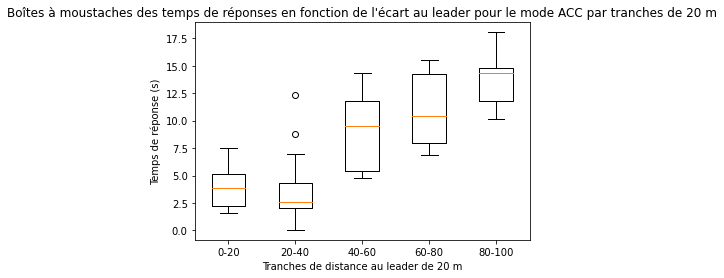

In [62]:
#boxplot
plt.boxplot([leader_liste_box_ACC0, leader_liste_box_ACC1, leader_liste_box_ACC2, leader_liste_box_ACC3, leader_liste_box_ACC4])
plt.title("Boîtes à moustaches des temps de réponses en fonction de l'écart au leader pour le mode ACC par tranches de 20 m")
plt.xlabel("Tranches de distance au leader de 20 m")
plt.ylabel("Temps de réponse (s)")
plt.gca().xaxis.set_ticklabels(['0-20', '20-40', '40-60', '60-80', '80-100'])

## Ecart au prédécesseur

In [40]:
#par rapport au leader
df_ecart_position_predec_CACC = pd.DataFrame()
df_ecart_position_predec_CACC['F'] = np.arange(1, 5)
df_ecart_position_predec_CACC = pd.concat([df_ecart_position_predec_CACC, df_ecart_position_predec_CACC_proof, df_ecart_position_predec_CARMA], axis = 1)

In [41]:
df_ecart_position_predec_CACC

,F,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,...,chgt5,chgt6,chgt7,chgt8,chgt9,chgt10,chgt11,chgt12,chgt13,chgt14
0,1,1,33.0,22.0,33.0,3.0,33.0,23.0,33.0,1.0,...,4.375,21.125,28.500,21.500,5.00,13.375,20.375,7.750,21.625,24.500
1,2,2,33.0,23.0,33.0,2.0,35.0,23.0,33.0,2.0,...,8.125,20.625,28.375,19.500,4.00,13.125,16.875,7.875,45.375,62.250
2,3,3,33.0,23.0,33.0,3.0,34.0,23.0,33.0,3.0,...,0.000,0.000,0.000,0.000,3.25,13.000,18.125,17.500,28.500,39.375
3,4,4,35.0,22.0,33.0,2.0,33.0,23.0,30.0,4.0,...,10.750,22.125,31.125,21.375,9.25,13.875,18.500,7.125,36.750,56.750


In [42]:
#suppression de la colonne 'follower' répétée
#par rapport au leader
df_ecart_position_predec_CACC = df_ecart_position_predec_CACC.drop(df_ecart_position_predec_CACC.columns[21], axis='columns')

In [43]:
df_ecart_position_predec_CACC.columns = colonnes

In [44]:
df_tps_reponse_predec_CACC

,F,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,...,chgt24,chgt25,chgt26,chgt27,chgt28,chgt29,chgt30,chgt31,chgt32,chgt33
0,1,0.40,0.65,0.30,1.75,0.05,0.10,0.05,1.75,0.30,...,0.1,0.4,0.4,0.3,0.3,0.6,0.5,1.4,1.5,1.1
1,2,2.75,-0.20,0.00,0.65,1.60,-0.05,0.05,1.95,0.25,...,0.0,0.2,-0.1,0.0,1.6,0.0,0.1,2.2,2.4,2.5
2,3,4.60,1.30,1.60,2.90,1.55,0.20,0.15,0.80,3.65,...,0.9,-0.5,-0.2,-0.2,1.7,0.0,-0.2,-0.4,1.5,1.7
3,4,-2.95,-1.00,-1.35,1.50,3.65,0.15,4.55,1.50,2.45,...,-0.2,0.5,0.2,0.1,1.5,0.1,-0.1,2.5,2.3,2.3


In [45]:
df_ecart_position_predec_CACC

,F,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,...,chgt24,chgt25,chgt26,chgt27,chgt28,chgt29,chgt30,chgt31,chgt32,chgt33
0,1,33.0,22.0,33.0,3.0,33.0,23.0,33.0,1.0,33.0,...,4.375,21.125,28.500,21.500,5.00,13.375,20.375,7.750,21.625,24.500
1,2,33.0,23.0,33.0,2.0,35.0,23.0,33.0,2.0,33.0,...,8.125,20.625,28.375,19.500,4.00,13.125,16.875,7.875,45.375,62.250
2,3,33.0,23.0,33.0,3.0,34.0,23.0,33.0,3.0,32.0,...,0.000,0.000,0.000,0.000,3.25,13.000,18.125,17.500,28.500,39.375
3,4,35.0,22.0,33.0,2.0,33.0,23.0,30.0,4.0,32.0,...,10.750,22.125,31.125,21.375,9.25,13.875,18.500,7.125,36.750,56.750


No handles with labels found to put in legend.


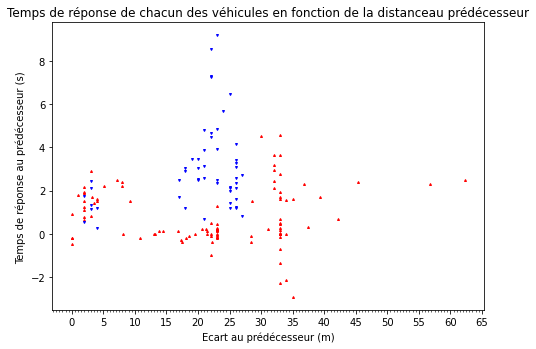

In [63]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
    ax.plot(df_ecart_position_predec_CACC['chgt{}'.format(j)][1:], df_tps_reponse_predec_CACC['chgt{}'.format(j)][1:], '^r', markersize = 2)
for j in range(1, len(df_tps_reponse_predec_ACC.columns)):
    ax.plot(df_ecart_position_predec_ACC['chgt{}'.format(j)][1:], df_tps_reponse_predec_ACC['chgt{}'.format(j)][1:], 'vb', markersize = 2)
ax.set_xlabel("Ecart au prédécesseur (m)")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel("Temps de réponse au prédécesseur (s)")
ax.set_title("Temps de réponse de chacun des véhicules en fonction de la distanceau prédécesseur")
ax.legend(loc='best', frameon=False)
plt.show()

In [64]:
df_ecart_position_predec_ACC

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,...,chgt14,chgt15,chgt16,chgt17,chgt18,chgt19,chgt20,chgt21,chgt22,chgt23
0,1,9.0,26.0,3.0,28.0,20.0,29.0,20.0,26.0,17.0,...,27.0,27.0,NaN,NaN,27.0,22.0,27.0,21.0,27.0,21.0
1,2,4.0,26.0,3.0,25.0,20.0,23.0,21.0,26.0,18.0,...,24.0,NaN,26.0,21.0,26.0,23.0,27.0,22.0,NaN,NaN
2,3,3.0,26.0,2.0,22.0,20.0,23.0,20.0,22.0,18.0,...,26.0,25.0,26.0,21.0,26.0,21.0,NaN,NaN,26.0,22.0
3,4,3.0,26.0,17.0,25.0,18.0,25.0,19.0,23.0,17.0,...,26.0,25.0,25.0,21.0,NaN,NaN,26.0,21.0,25.0,23.0


In [65]:
predec_max_ecart_CACC = np.int(np.max(df_distribution_CACC.ecart_position_predec))
predec_max_ecart_ACC = np.int(np.max(df_distribution_ACC.ecart_position_predec))
predec_max_ecart_CACC, predec_max_ecart_ACC

(62, 29)

In [66]:
for i in range(predec_max_ecart_CACC//10 + 1):
    globals()['predec_liste_box_CACC{}'.format(i)] = list(df_distribution_CACC.temps_predec[[10*i <= df_distribution_CACC.ecart_position_predec[k] <= 10*(i + 1) for k in range(len(df_distribution_CACC.ecart_position_predec))]])

for i in range(predec_max_ecart_ACC//10 + 1):
    globals()['predec_liste_box_ACC{}'.format(i)] = list(df_distribution_ACC.temps_predec[[10*i <= df_distribution_ACC.ecart_position_predec[k] <= 10*(i + 1) for k in range(len(df_distribution_ACC.ecart_position_predec))]])

[Text(3, 0, '0-10'),
 Text(10, 0, '10-20'),
 Text(17, 0, '20-30'),
 Text(24, 0, '30-40'),
 Text(31, 0, '40-50'),
 Text(38, 0, '50-60'),
 Text(45, 0, '60-70')]

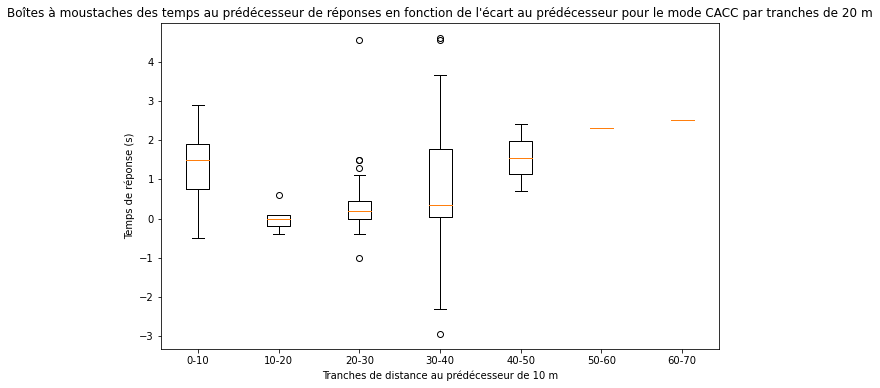

In [67]:
#boxplot
fig = plt.figure(1, figsize = (10, 6))
plt.boxplot([predec_liste_box_CACC0, predec_liste_box_CACC1, predec_liste_box_CACC2, predec_liste_box_CACC3, predec_liste_box_CACC4, predec_liste_box_CACC5, predec_liste_box_CACC6], widths = [2, 2, 2, 2, 2, 2, 2], positions = [3, 10, 17, 24, 31, 38, 45])
plt.title("Boîtes à moustaches des temps au prédécesseur de réponses en fonction de l'écart au prédécesseur pour le mode CACC par tranches de 20 m")
plt.xlabel("Tranches de distance au prédécesseur de 10 m")
plt.ylabel("Temps de réponse (s)")
plt.gca().xaxis.set_ticklabels(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70'])

In [68]:
len(predec_liste_box_CACC3)

44

[Text(1, 0, '0-10'), Text(2, 0, '10-20'), Text(3, 0, '20-30')]

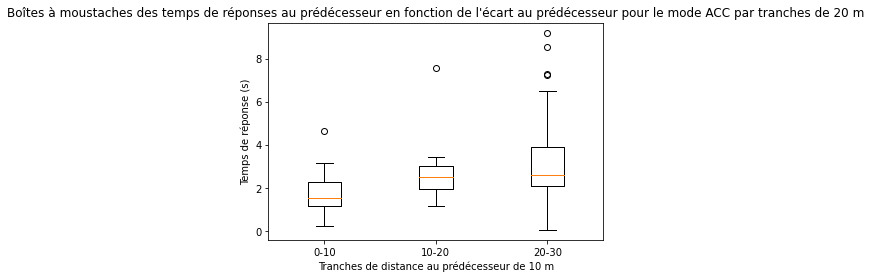

In [69]:
#boxplot
plt.boxplot([predec_liste_box_ACC0, predec_liste_box_ACC1, predec_liste_box_ACC2])
plt.title("Boîtes à moustaches des temps de réponses au prédécesseur en fonction de l'écart au prédécesseur pour le mode ACC par tranches de 20 m")
plt.xlabel("Tranches de distance au prédécesseur de 10 m")
plt.ylabel("Temps de réponse (s)")
plt.gca().xaxis.set_ticklabels(['0-10', '10-20', '20-30'])

In [70]:
df_distribution_CACC

,temps,vitesse,ecart_position_leader,temps_predec,ecart_position_predec
0,0.40,26.340,33.000,0.40,33.000
1,3.15,26.340,66.000,2.75,33.000
2,7.75,26.340,93.000,4.60,33.000
3,4.80,26.340,135.000,-2.95,35.000
4,0.65,19.760,22.000,0.65,22.000
...,...,...,...,...,...
94,1.00,0.001,14.000,0.90,0.000
95,0.80,0.001,24.250,-0.20,10.750
96,0.40,20.056,21.125,0.40,21.125
97,0.60,20.056,41.750,0.20,20.625


In [73]:
df_distribution_CACC.to_csv('df_distribution_CACC.csv', index = False)
df_distribution_ACC.to_csv('df_distribution_ACC.csv', index = False)
